<a href="https://colab.research.google.com/github/markpedraza/Starter-Neural-Network/blob/main/FirstNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Starter Neural Network project.
## - We will use the iris dataset to predict the class of a flower.
## - 4 features of the flower will be used
# Credits
## - This project was made by following a tutorial from "Codemy.com" on YouTube.
## - https://www.youtube.com/playlist?list=PLCC34OHNcOtpcgR9LEYSdi9r7XIbpkpK1


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
# Create a Model class that inherits nn.Module
class Model(nn.Module):
  # Input layer (4 features of the flower) -->
  # H2 (n)
  # output (3 classes of iris flowers)
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [3]:
# Pick a manual seed for randomization
SEED = 645
torch.manual_seed(SEED)
# Create and instance of the model
model = Model()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [6]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
# Change last column from string to integer
my_df['species'] = my_df['species'].replace({'setosa':0, 'versicolor':1, 'virginica':2})

<ipython-input-7-2531912312>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace({'setosa':0, 'versicolor':1, 'virginica':2})


In [8]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
# Train test split. Set X, y
X = my_df.drop('species', axis=1)
y = my_df['species']

In [10]:
# Convert X and Y to numpy arrays.
X = X.values
y = y.values

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [13]:
# Convert to tensors

# X will float tensorrs
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

# Y will be long tensors (since Y only has ints, 0 1 2)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [14]:
# Set the criterion of model to measure the error, how far off the predictions are from
criterion = nn.CrossEntropyLoss()

# Choose Optimizer, (Adam Optimizer), lr = learning rate (if error doesnt go down after a bunch of iterations (epocs), lower learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [15]:
# Train our model
# Epochs? (one run thru all the training data in our network)
epochs = 100
losses = [] # we want to minize our losses over time. We will append them here each time

for i in range(epochs):
  # Go foward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error. Gonna be high at first
  loss = criterion(y_pred, y_train) # predicted value vs the y_train value

  # Keep Track of our losses (dont have to do this but it will help determine if this is working correctly)
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of foward propogation and feed it back
  # thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.0751948356628418
Epoch: 10 and loss: 0.8015899062156677
Epoch: 20 and loss: 0.5387934446334839
Epoch: 30 and loss: 0.38763532042503357
Epoch: 40 and loss: 0.27902689576148987
Epoch: 50 and loss: 0.17582927644252777
Epoch: 60 and loss: 0.10438882559537888
Epoch: 70 and loss: 0.06881185621023178
Epoch: 80 and loss: 0.052348792552948
Epoch: 90 and loss: 0.043923307210206985


Text(0.5, 0, 'Epochs')

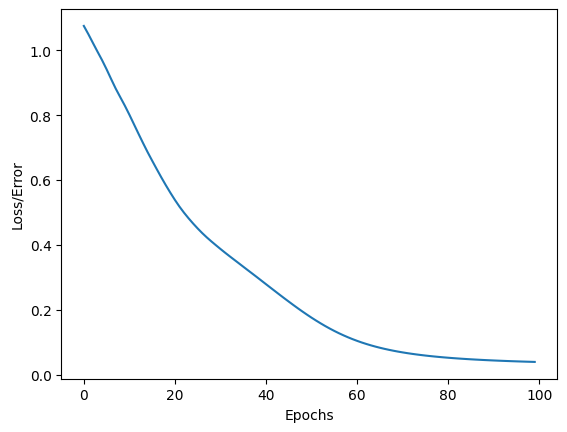

In [16]:
# Graph out losses over epochs
plt.plot(range(epochs), losses)
plt.ylabel('Loss/Error')
plt.xlabel('Epochs')

In [17]:
# Evalute Model on Test Data set (validate model on test set)
with torch.no_grad(): # Basically turn off back propagation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be our predictions
  loss = criterion(y_eval, y_test) # Find the loss or error

In [18]:
loss

tensor(0.1534)

In [19]:
# Remember that our loss when training at the end was Epoch: 90 and loss: 0.043923307210206985.
# The printed loss above is 0.1534.

# Lets see how many we get correct in our test data
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "setosa"
    elif y_test[i] == 1:
      x = "versicolor"
    else:
      x = "virginica"

    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.) {str(y_val)} \t {x} : {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1
# Lets us know how many we got correct
print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test):.2f}% correct')

1.) tensor([-5.9157,  1.9267,  6.9793]) 	 virginica : 2
2.) tensor([-1.9827,  5.0629,  1.4886]) 	 versicolor : 1
3.) tensor([ 14.3245,   6.8517, -18.1398]) 	 setosa : 0
4.) tensor([-2.2189,  4.6714,  1.8469]) 	 versicolor : 1
5.) tensor([ 12.4578,   6.2399, -15.8806]) 	 setosa : 0
6.) tensor([-4.9219,  3.1260,  5.5445]) 	 virginica : 2
7.) tensor([-0.0169,  6.0165, -1.0933]) 	 versicolor : 1
8.) tensor([-3.7710,  3.3385,  4.0267]) 	 virginica : 2
9.) tensor([ 13.8535,   6.6294, -17.5604]) 	 setosa : 0
10.) tensor([ 13.9367,   6.7096, -17.6675]) 	 setosa : 0
11.) tensor([-5.4790,  3.1888,  6.2536]) 	 virginica : 2
12.) tensor([-2.3821,  4.6800,  2.0559]) 	 versicolor : 1
13.) tensor([-9.9291,  0.0525, 12.4145]) 	 virginica : 2
14.) tensor([-0.5093,  5.5357, -0.4556]) 	 versicolor : 1
15.) tensor([-4.7034,  3.8573,  5.1627]) 	 virginica : 2
16.) tensor([-2.1788,  4.2966,  1.8398]) 	 versicolor : 1
17.) tensor([ 2.4129,  5.5219, -3.9076]) 	 versicolor : 1
18.) tensor([-4.8058,  1.4242,  5

In [20]:
# Print shows 3 columns. The final column shows 0 1 or 2. Remember that these are the flower predictions.

In [21]:
# We will now create a NEW data point and get our neural network to predict which setosa it is

# New data point
new_iris = torch.tensor([[4.7, 3.2, 1.3, 0.7]])

In [22]:
with torch.no_grad():
  print(model.forward(new_iris))

  # The printout shows an array. Index [0] has the largest number, which means its likely a setosa.
  # Remember:
  #   setosa: 0
  #   versicolor : 1
  #   virginica : 2


tensor([[ 11.6408,   5.9410, -14.8909]])


In [23]:
# This "new" datapoint is taken directly from the first row of the dataset which is a setosa. So will the model get it right?
newer_iris = torch.tensor([[5.1, 3.5, 1.4, 0.2]])

with torch.no_grad():
  print(model.forward(newer_iris))

  # It will! The largest number is index at 0 which means its likely Setosa.

tensor([[ 13.8535,   6.6294, -17.5604]])


In [24]:
# Save our NN model
torch.save(model.state_dict(), 'iris_nn.pt') # model.state_dict() saves the model and its weights into a dictionary. The 'iris_nn.pt' is the name it will be saved to.

In [25]:
# Load the model
new_model = Model() # New empty model with nothing.
new_model.load_state_dict(torch.load('iris_nn.pt')) # This loads in all the weights an biases that we saved.

<All keys matched successfully>

In [26]:
# Make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)